In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Define the gridworld
gridworld = np.zeros((7, 10))
start_state = (3, 0)
goal_state = (3, 7)
wind = np.array([0, 0, 0, 1, 1, 1, 2, 2, 1, 0])

In [36]:
# Define the actions
actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # right, left, down, up

# Initialize the Q-values
Q = np.zeros((7, 10, len(actions)))

# Set the parameters
alpha = 0.5
gamma = 1
epsilon = 0.1
num_episodes = 500

In [37]:
# SARSA algorithm
def sarsa(Q=Q, start_state=start_state, goal_state=goal_state, wind=wind, actions=actions, alpha=alpha, gamma=gamma, epsilon=epsilon, num_episodes=num_episodes):
    # Initialize the list to store the states visited in each episode
    states_visited = []
    for episode in range(num_episodes):
        state = start_state
        action_index = np.random.choice(range(len(actions))) if np.random.uniform() < epsilon else np.argmax(Q[state])

        states_visited_episode = [state]  # Store the states visited in this episode

        while state != goal_state:
            next_state = (state[0] + actions[action_index][0] - wind[state[1]], state[1] + actions[action_index][1])
            next_state = (max(min(next_state[0], 6), 0), max(min(next_state[1], 9), 0))  # Ensure next_state is within the grid
            next_action_index = np.random.choice(range(len(actions))) if np.random.uniform() < epsilon else np.argmax(Q[next_state])

            reward = -1
            Q[state][action_index] += alpha * (reward + gamma * Q[next_state][next_action_index] - Q[state][action_index])

            state = next_state
            action_index = next_action_index

            states_visited_episode.append(state)

        states_visited.append(states_visited_episode)
    return states_visited

In [38]:
states_visited = sarsa()

/Users/fateme/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/fateme/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/fateme/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/fateme/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:

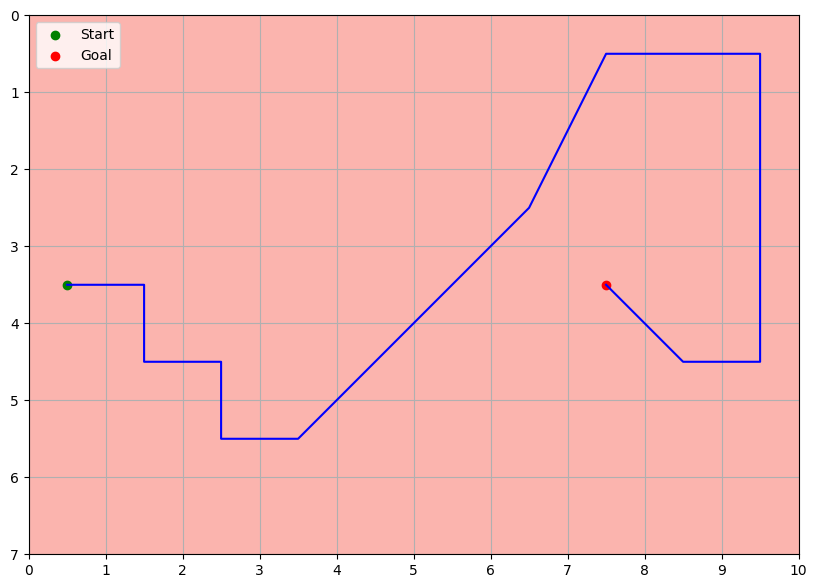

In [39]:
# Plot the path of the agent in the last episode
plt.figure(figsize=(10, 7))
plt.imshow(gridworld, cmap='Pastel1', extent=[0, 10, 0, 7])
y, x = zip(*states_visited[-1])
plt.plot(np.array(x) + 0.5, np.array(y) + 0.5, color='blue')  # Draw the path with a line
plt.scatter(start_state[1] + 0.5, start_state[0] + 0.5, color='green', label='Start')
plt.scatter(goal_state[1] + 0.5, goal_state[0] + 0.5, color='red', label='Goal')
plt.grid(True)  # Show the grid
plt.xticks(range(11))  # Set x-ticks
plt.yticks(range(8))  # Set y-ticks
plt.gca().invert_yaxis()  # Invert y-axis
plt.legend()
plt.show()

# 8 action 

In [40]:
# 8 actions 
actions = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]
Q = np.zeros((7, 10, len(actions)))
states_visited = sarsa(actions=actions,Q=Q)

/Users/fateme/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/fateme/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/fateme/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/fateme/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:

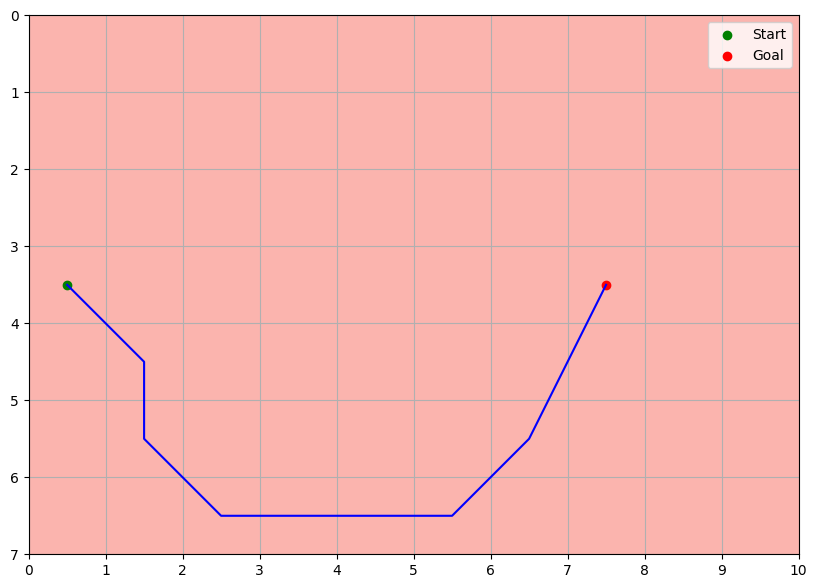

In [41]:
# Plot the path of the agent in the last episode
plt.figure(figsize=(10, 7))
plt.imshow(gridworld, cmap='Pastel1', extent=[0, 10, 0, 7])
y, x = zip(*states_visited[-1])
plt.plot(np.array(x) + 0.5, np.array(y) + 0.5, color='blue')  # Draw the path with a line
plt.scatter(start_state[1] + 0.5, start_state[0] + 0.5, color='green', label='Start')
plt.scatter(goal_state[1] + 0.5, goal_state[0] + 0.5, color='red', label='Goal')
plt.grid(True)  # Show the grid
plt.xticks(range(11))  # Set x-ticks
plt.yticks(range(8))  # Set y-ticks
plt.gca().invert_yaxis()  # Invert y-axis
plt.legend()
plt.show()